In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bus=pd.read_csv('businessfiltered.csv')
review=pd.read_csv('reviewsandsent.csv')

C:\Users\yanni\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (39,57,71,74,85,88,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\yanni\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Alter data sets to give only what I need to focus on

In [3]:
review_bus = review[['text', 'business_id','stars','user_id','sentiment score']]
attribute_list = []
for i in bus.columns:
    if i[:5] == 'attri':
        fill, attr = i.split('.',1)
        attribute_list.append(attr)

In [4]:
s=set([])
attr_list = []
a =[]
for i in attribute_list:
    a = i.lower().split('.')
    for b in a:
        s.add(b)
        attr_list.append(b)

        
        

In [5]:
attribute_set = set({'acceptsinsurance', 'african american', 'agesallowed', 'alcohol', 'ambience', 'asian', 'background music', 'bestnights', 'bikeparking', 'breakfast',
 'brunch', 'businessacceptsbitcoin',  'businessacceptscreditcards', 'businessparking', 'byappointmentonly', 'byob', 'byobcorkage',
 'casual', 'caters', 'classy', 'coatcheck', 'coloring', 'corkage', 'curly', 'dairy-free', 'dessert', 'dietaryrestrictions',
 'dinner', 'divey', 'dj', 'dogsallowed', 'drivethru', 'extensions', 'friday', 'garage', 'gluten-free', 'goodfordancing',
 'goodforkids', 'goodformeal', 'hairspecializesin', 'halal', 'happyhour', 'hastv',
 'hipster', 'intimate', 'jukebox', 'karaoke', 'kids', 'kosher', 'latenight', 'live',
 'lot', 'lunch', 'music', 'no_music', 'noiselevel', 'open24hours', 'outdoorseating',
 'perms', 'attire', 'counterservice', 'delivery', 'groups', 'reservations', 'table service', 'takeout',
 'romantic',  'smoking', 'soy-free', 'perms', 'street', 'touristy', 'trendy', 'upscale',
 'valet', 'validated', 'vegan', 'vegetarian', 'video', 'wheelchair', 'wifi'})


In [6]:
import pandas as pd
from pandas import Series, DataFrame
import pandas as pd
import numpy as np  
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
import itertools
import matplotlib as plt
%pylab inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yanni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Populating the interactive namespace from numpy and matplotlib


C:\Users\yanni\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt', 'fill']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
def message_to_attributes(message):
    # Function to convert a raw message to a string of words
    #
    # 1. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", str(message)) 
    #
    # 2. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #                
    # 4. Remove stop words
    meaningful_words = [w for w in words if  w in attribute_set]    
    #
    # 5. Remove duplicates
    uwords = []
    [uwords.append(x) for x in meaningful_words if x not in uwords]
    # 6. Join the words back into one string separated by space, 
    onestring = ( " ".join( uwords )) 
    #
    total_messages.append(onestring)
    # 7. return the string
    return onestring

In [8]:
total_messages = []
review_bus['attributes'] = review_bus['text'].map(message_to_attributes)

C:\Users\yanni\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [329]:
def get_bus_attr(message):
    attribute_per_listing = []
    for label in message.axes:
        str_list = str(message[label]).split('\n')
        for item in str_list:
            if item[:3] == 'att':
                item = " ".join(item.split())
                attribute, result = item.split(' ')
                attribute = attribute.split('.')[1]
                if len(result) == 4:
                    attribute=attribute.lower()
                    attribute_per_listing.append(attribute)
    return attribute_per_listing

In [255]:
bus['attributes_list'] = bus.apply(get_bus_attr, 1)

In [256]:
bus_attr = bus[['attributes_list', 'business_id']]

In [11]:
bus_attr.set_index(bus_attr['business_id'])
review_bus.set_index(review_bus['business_id'])

NameError: name 'bus_attr' is not defined

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [10]:
vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 5000) 

brandwords = vectorizer.fit_transform(total_messages)
brandvocab = vectorizer.get_feature_names()
df_brandcounts = pd.DataFrame(data = brandwords.toarray() , columns = brandvocab).T
df_brandcounts.head()

,0,1,2,3,4,5,6,7,8,9,...,1456256,1456257,1456258,1456259,1456260,1456261,1456262,1456263,1456264,1456265
alcohol,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ambience,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
asian,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
attire,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
breakfast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_brandcounts['Total Counts'] = df_brandcounts.sum(axis=1)
lenght_list=[]


In [12]:
from sklearn import metrics
dummy = ones(53)
cossim = cosine_similarity(X=brandwords, Y=dummy)
my_list = map(lambda x: x[0], cossim)
ser = pd.Series(my_list)
review_bus['Cosine Similarity'] = ser

C:\Users\yanni\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\yanni\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
mean(review_bus['Cosine Similarity'])

0.06003045119070513

In [14]:
review_bus.sort_values(['Cosine Similarity'], ascending=False)

,text,business_id,stars,user_id,sentiment score,attributes,Cosine Similarity
945600,In the two years that I've lived in the Vegas ...,k8BqCejnaMlw7aoVthvqyw,4.0,8KWR1qLgN2rTZ4VSGW9yvg,0.133,live music dinner lot ambience attire groups c...,0.495261
704434,I spent this past weekend at Paris for my best...,ii8sAGBexBOJoYRFafF9XQ,4.0,0J1SuSUgS6rBoTgn358KsQ,0.224,dinner ambience live music alcohol breakfast l...,0.434372
783179,Our initial thoughts of getting married in Veg...,TSGQekzPDF9dCj3bNsehJw,5.0,Q3wAsfTIi1PMqyTqUMmEjQ,0.146,live music delivery dinner brunch upscale vege...,0.434372
704028,I received an Identity Membership promotion vi...,1DP5vHxJzCDbgawv0WC3yA,5.0,ouk36OGbx25nO23b10L5jw,0.144,lot classy dj dinner music intimate reservatio...,0.434372
1012055,Warning: LONG REVIEW. SORRY =)\r\n\r\nI was su...,bpRo8L8dkhgbJhdIKa9mwA,4.0,BH_HKhJcoCg7hsL8ezCYxA,0.200,lot groups romantic music live dj alcohol dess...,0.434372
924535,"Summary: Go here if you're an iced tea snob, m...",VzUo-RURV3VnfNItAYM8yg,5.0,QUWEjNeAUCtHe0_7OOVXoQ,0.242,dinner music groups lot breakfast lunch kids w...,0.412082
35105,Excerpted from a longer blog post about my exp...,5LNZ67Yw9RD6nf4_UhXOjw,5.0,FKKLUKDzMVbMPYSp0fbiww,0.152,dinner street live reservations romantic brunc...,0.412082
1360592,We come to Las Vegas for business and pleasure...,eEnNw3_hBvxcFHyr23kAuA,5.0,zXeBs2mdeybzDPVTmaeWtQ,0.174,friday music valet live dessert delivery lot r...,0.412082
142348,Rating for: LUNCH\r\n\r\nI'm giving this buffe...,2weQS-RnoOBhb1KsHKyoSQ,5.0,QKmjpLamdy1jhX8v8ilZRg,0.253,lunch dessert ambience casual dinner halal kos...,0.412082
704684,I was in town for a yearly conference; the gir...,AMTNJbYbu0OMMAkx4meQxw,5.0,VSwB0IT2PaV_O5ZYI4LPAg,0.124,reservations dinner ambience romantic lot dess...,0.412082


In [15]:
review_bus.groupby(['business_id'])['Cosine Similarity'].mean().sort_values(ascending = False)

business_id
jWUShkhq7Fe3OKr3NvQecQ    0.225442
v9nBMrPJDLrEkwX02Txf3Q    0.221078
hCSNmhsjMyLnpGasEcOENw    0.208810
qFxuhYK5VzuZ8BbNNHGK-A    0.208810
mKC0qzGy50IFb5Rp86Nv6w    0.208810
--DdmeR16TRb3LsjG0ejrQ    0.205055
3WwyJXS5i0K9pjTDpxu65A    0.204397
uRyGleoLHgMVp7StcJfj7g    0.201360
7eJGceqlI4c9Yd2uXulBug    0.200149
Q3sbnOLbr7g-5Kehtvxs0A    0.198790
78SftdHMXEHdQVs24z39fw    0.196712
GYTE331LlKZr6O0ADFDSdA    0.194257
LAoK-5hDjqALXQ9F6RrVIw    0.194257
4ZhvG-t28ZoViCFXiANwSw    0.194257
RxcEcmNx4XiQWb8oRdFEYQ    0.194077
WVsRzlRdnK4rKKWdeLYR1w    0.192686
aNFgmPNMXI-qjDB_d45oWQ    0.192051
WfITErw6wT8HrzQdMeLjsg    0.190948
7SBtCKKeHbdB6-dIIkcZXw    0.190697
SYIVQISajxm2J9lAnMp1RA    0.189844
1f9jrB7LDPZGS2AXW0o67A    0.189844
bIizBQc3QrGz3i59EiOivw    0.189844
Ig-ecmGaE1-0AAGut70xTg    0.189844
DsMIfKq8pZgcgcrryHDKRA    0.189844
K5MVCy1gPnExQPEKnCnh8A    0.188186
LlJ5O6zbSxK9U2fsJeScXg    0.187638
QpHJvtmTWWoiz42bb2nTiA    0.187638
bXISj8RpXaAilaPLtJuzKg    0.187638
KWBCsxyH

In [34]:
stars = review_bus.groupby(['stars'])['Cosine Similarity'].mean()

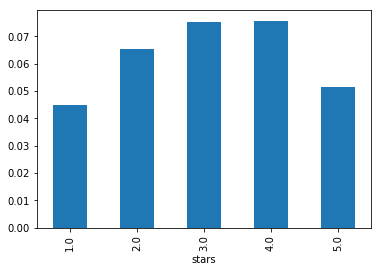

In [49]:
stars.plot(kind='bar')

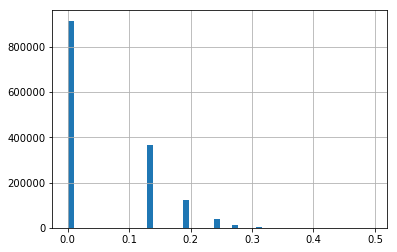

In [17]:
review_bus['Cosine Similarity'].hist(bins=50)

In [18]:
review_bus.groupby(['attributes'])['Cosine Similarity'].count().sort_values(ascending = False)

attributes
                                            915086
lot                                          58035
dinner                                       37881
lunch                                        35566
breakfast                                    30319
music                                        23372
dessert                                      21214
kids                                         20399
live                                         17414
street                                       14072
friday                                        9243
asian                                         9092
delivery                                      8971
brunch                                        7197
reservations                                  5836
alcohol                                       5194
vegan                                         4832
lunch dinner                                  4816
dinner dessert                                4765
casual              

In [19]:
review_bus['Cosine Similarity'].corr(review_bus['sentiment score'])

-0.0510286793623623

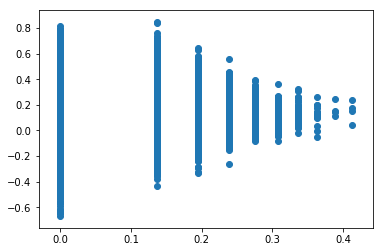

In [20]:
matplotlib.pyplot.scatter(review_bus['Cosine Similarity'][:100000], review_bus['sentiment score'][:100000])

In [21]:
user_df = review_bus.groupby(['user_id'])['Cosine Similarity'].mean().sort_values(ascending = False)

In [31]:
def split_values(series):
    for line in series:
         cos_avg_usr.append(line)

In [39]:
print stars
cos_avg_usr = []
split_values(stars)

stars
1.0    0.045030
2.0    0.065206
3.0    0.075088
4.0    0.075704
5.0    0.051521
Name: Cosine Similarity, dtype: float64


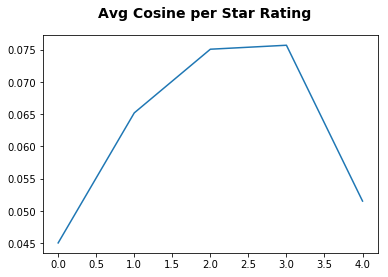

In [44]:
fig = plt.figure()
fig.suptitle('Avg Cosine per Star Rating', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax =plt.plot(cos_avg_usr)


In [25]:
attr_df = review_bus.groupby(['attributes'])['Cosine Similarity'].count().sort_values(ascending = False)

def split_values(series):
    for line in series:
         cos_avg_attr.append(line)

In [26]:
cos_avg_attr = []
split_values(attr_df)
cos_avg_attr=cos_avg_attr[2:]

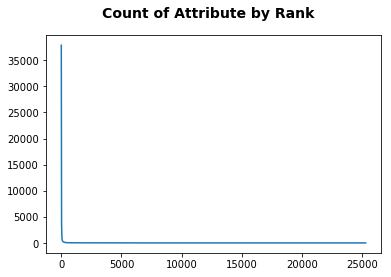

In [27]:
fig = plt.figure()
fig.suptitle('Count of Attribute by Rank', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax =plt.plot(cos_avg_attr)